### Prep Data for Multiple Linear Regression

In [3]:
import pandas as pd

In [4]:
# import baseball stats data
stats = pd.read_csv('../Final Project/ds_final_stats.csv')
# rename players column
stats = stats.rename(columns = {'last_name, first_name': 'player'})
# set players column as index
stats = stats.set_index('player')
# drop unnecessary column player_id
stats = stats.drop('player_id', axis=1)
stats.shape
stats

,year,single,double,triple,home_run,strikeout,walk,batting_avg,on_base_plus_slg,b_rbi,b_total_bases,r_total_stolen_base,barrel_batted_rate,in_zone_percent
player,,,,,,,,,,,,,,
"Pujols, Albert",2019,75,22,0,23,68,43,0.244,0.735,93,211,3,5.8,47.3
"Cabrera, Miguel",2019,106,21,0,12,108,48,0.282,0.744,59,196,0,6.4,46.0
"Choo, Shin-Soo",2019,92,31,2,24,165,78,0.265,0.826,61,256,15,8.8,49.8
"Jones, Adam",2019,84,25,1,16,101,31,0.260,0.727,67,201,2,6.7,46.2
"Cruz Jr., Nelson",2019,74,26,0,41,131,56,0.311,1.031,108,290,0,19.9,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Chourio, Jackson",2024,91,29,4,21,121,39,0.275,0.791,79,245,22,7.8,49.6
"Schanuel, Nolan",2024,98,19,0,13,103,68,0.250,0.705,54,188,10,3.5,50.0
"Langford, Wyatt",2024,81,25,4,16,115,51,0.253,0.740,74,207,19,9.3,48.0


In [5]:
# select columns for use in MLR
features = ['single', 'double', 'triple', 'home_run', 'strikeout', 'walk', 'batting_avg', 
              'b_rbi', 'b_total_bases', 'r_total_stolen_base', 'barrel_batted_rate', 'in_zone_percent']
target = ['on_base_plus_slg']

### Begin Multiple Linear Regression

In [6]:
# split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(stats[features], stats[target], random_state=3)

In [7]:
# model building
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X=X_train, y=y_train)

LinearRegression()

### Evaluate our Model

In [8]:
# use model to make predictions
y_predictions = linear_regression_model.predict(X_test)

In [9]:
# predicted vs actual
# y_predictions vs y_test dataframe
findings = pd.DataFrame()
findings['Actual'] = y_test 
findings['Predictions'] = y_predictions
findings.head()

,Actual,Predictions
player,,
"Abreu, José",0.824,0.807371
"Raleigh, Cal",0.762,0.765326
"Kemp, Tony",0.641,0.644158
"Suzuki, Seiya",0.848,0.846508
"Bellinger, Cody",0.881,0.887010


### Mean Squared Error

In [10]:
import statistics
# find mean squared error of findings data
def mse(predicted, actual):
    mse = ((i-k)**2 for i,k in zip(predicted, actual))
    return statistics.mean(mse)

In [11]:
stats_mse = mse(findings['Predictions'], findings['Actual'])

In [12]:
f'Mean squared error of stats data is {stats_mse}.'

'Mean squared error of stats data is 8.457601209942882e-05.'

### Coefficient of Determination (R²)

In [13]:
# find r-squared of findings data
from sklearn.metrics import r2_score
stats_r2score = r2_score(findings['Actual'], findings['Predictions'])

In [14]:
f'R-squared value of stats data is {stats_r2score}.'

'R-squared value of stats data is 0.9900065210743451.'

### Visualize our Model

/Users/wesleychapman/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


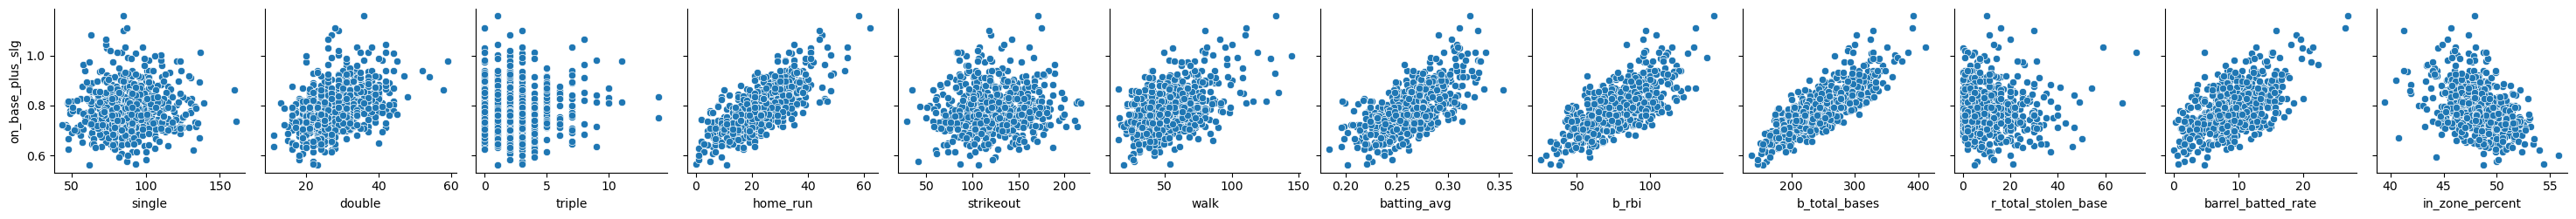

In [32]:
import seaborn as sns
# pairplot of all indepedent variables against OPS
sns.pairplot(stats, y_vars = target, x_vars = features)

In [26]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Predicted vs Actual OPS Values')

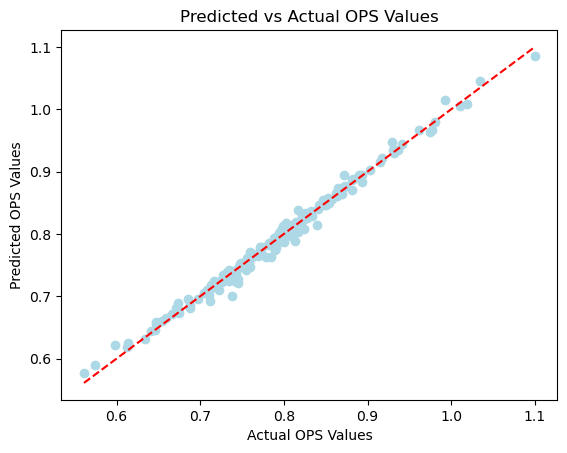

In [27]:
# scatter plot of actual vs predicted OPS values
plt.scatter(findings['Actual'], findings['Predictions'], c='lightblue')
plt.plot([min(findings['Actual']), max(findings['Actual'])], [min(findings['Actual']), max(findings['Actual'])], color='red', linestyle='--')
plt.xlabel('Actual OPS Values')
plt.ylabel('Predicted OPS Values')
plt.title('Predicted vs Actual OPS Values')